In [2]:
import pandas as pd

## Séries históricas disponíveis em
## http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/
arquivo_bovespa = '/home/tumenas/Projetos/Trading/data/COTAHIST_A2020.TXT'


## Estrutura do arquivo disponível em 
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf

tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

dados_acoes=pd.read_fwf(arquivo_bovespa, widths=tamanho_campos, header=0)

In [3]:
## Nomear as colunas

dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]

In [4]:
dados_acoes.head()

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,20200102,2.0,AALR3,10,ALLIAR,ON NM,NaN,R$,18.29,...,2443.0,585800.0,10946196.0,0.0,0.0,99991231.0,1.0,0.0,BRAALRACNOR6,101.0
1,1,20200102,2.0,AAPL34,10,APPLE,DRN,NaN,R$,120.00,...,9.0,12700.0,1533380.0,0.0,0.0,99991231.0,1.0,0.0,BRAAPLBDR004,131.0
2,1,20200102,2.0,ABCB4,10,ABC BRASIL,PN EJ N2,NaN,R$,20.00,...,3979.0,870400.0,17457878.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,133.0
3,1,20200102,2.0,ABEV3,10,AMBEV S/A,ON EJ,NaN,R$,18.86,...,31581.0,16011300.0,306234791.0,0.0,0.0,99991231.0,1.0,0.0,BRABEVACNOR1,122.0
4,1,20200102,2.0,ADHM3,10,ADVANCED-DH,ON,NaN,R$,2.55,...,307.0,193400.0,471927.0,0.0,0.0,99991231.0,1.0,0.0,BRADHMACNOR9,101.0


In [5]:
dados_acoes['tipo_mercado'].unique()

array([10, 20, 17, 30, 70, 80, 12, 13])

In [6]:
# Alguns tipos de mercado

# 10 - Mercado à vista
# 70 - Opções de Compra
# 80 - Opções de Venda

dados_acoes[dados_acoes['tipo_mercado']==70]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
294508,1,20200102,78.0,ABEVA210,70,ABEV /EJ,ON,0.0,R$,0.04,...,72.0,750100.0,22794.0,20.58,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
294509,1,20200102,78.0,ABEVC185,70,ABEV /EJ,ON,0.0,R$,1.47,...,1.0,300.0,441.0,18.08,0.0,20200316.0,1.0,0.0,BRABEVACNOR1,121.0
294510,1,20200102,78.0,ABEVC205,70,ABEV /EJ,ON,0.0,R$,0.36,...,8.0,6400.0,2299.0,20.08,0.0,20200316.0,1.0,0.0,BRABEVACNOR1,121.0
294511,1,20200102,78.0,ABEVA200,70,ABEV FM/EJ,ON,0.0,R$,0.14,...,180.0,917800.0,146653.0,19.58,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
294512,1,20200102,78.0,ABEVA205,70,ABEV FM/EJ,ON,0.0,R$,0.07,...,85.0,200200.0,14266.0,20.08,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251632,1,20201230,78.0,YDUQA340,70,YDUQ FM,ON NM,0.0,R$,0.94,...,4.0,1600.0,1400.0,34.00,0.0,20210118.0,1.0,0.0,BRYDUQACNOR3,101.0
1251633,1,20201230,78.0,YDUQA350,70,YDUQ FM,ON NM,0.0,R$,0.58,...,5.0,9100.0,4495.0,35.00,0.0,20210118.0,1.0,0.0,BRYDUQACNOR3,101.0
1251634,1,20201230,78.0,YDUQA360,70,YDUQ FM,ON NM,0.0,R$,0.42,...,13.0,138000.0,43412.0,36.00,0.0,20210118.0,1.0,0.0,BRYDUQACNOR3,101.0
1251635,1,20201230,78.0,YDUQA380,70,YDUQ,ON NM,0.0,R$,0.10,...,3.0,1400.0,153.0,38.00,0.0,20210118.0,1.0,0.0,BRYDUQACNOR3,101.0


In [10]:
import matplotlib.pyplot as plt

dados_acoes[(dados_acoes['tipo_mercado']==10)&(dados_acoes['cod_negociacao']=='ABEV3')][['data_pregao','preco_ultimo_negocio']]

,data_pregao,preco_ultimo_negocio
3,20200102,19.20
1039,20200103,18.93
1133,20200106,19.02
3399,20200107,19.06
3400,20200108,18.97
...,...,...
285432,20201222,15.51
285433,20201223,15.50
285434,20201228,15.77
285435,20201229,15.95


In [11]:
dados_acoes[(dados_acoes['tipo_mercado']==70)&dados_acoes['cod_negociacao'].str.contains("ABEV")&(dados_acoes['numero_negocios']>100)]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
294511,1,20200102,78.0,ABEVA200,70,ABEV FM/EJ,ON,0.0,R$,0.14,...,180.0,917800.0,146653.0,19.58,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
297157,1,20200103,78.0,ABEVA200,70,ABEV FM/EJ,ON,0.0,R$,0.12,...,104.0,495400.0,70785.0,19.58,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
297175,1,20200103,78.0,ABEVB21,70,ABEV FM/EJ,ON,0.0,R$,0.13,...,136.0,2124300.0,370988.0,20.58,0.0,20200217.0,1.0,0.0,BRABEVACNOR1,121.0
299825,1,20200106,78.0,ABEVA200,70,ABEV FM/EJ,ON,0.0,R$,0.14,...,270.0,712000.0,88514.0,19.58,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
299826,1,20200106,78.0,ABEVA205,70,ABEV FM/EJ,ON,0.0,R$,0.06,...,140.0,225800.0,11254.0,20.08,0.0,20200120.0,1.0,0.0,BRABEVACNOR1,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247495,1,20201230,78.0,ABEVA170,70,ABEV FM/EJ,ON,0.0,R$,0.21,...,198.0,790800.0,139191.0,16.65,0.0,20210118.0,1.0,0.0,BRABEVACNOR1,122.0
1247506,1,20201230,78.0,ABEVA155,70,ABEV FM/EJ,ON,0.0,R$,1.05,...,256.0,3557700.0,3194342.0,15.15,0.0,20210118.0,1.0,0.0,BRABEVACNOR1,122.0
1247507,1,20201230,78.0,ABEVA160,70,ABEV FM/EJ,ON,0.0,R$,0.66,...,225.0,2307100.0,1317393.0,15.65,0.0,20210118.0,1.0,0.0,BRABEVACNOR1,122.0
1247508,1,20201230,78.0,ABEVA165,70,ABEV FM/EJ,ON,0.0,R$,0.39,...,206.0,1183500.0,394454.0,16.15,0.0,20210118.0,1.0,0.0,BRABEVACNOR1,122.0


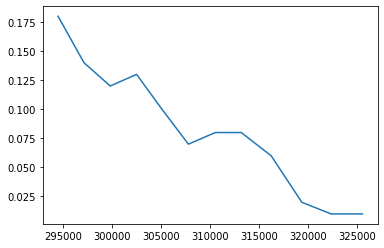

In [13]:
plt.plot(dados_acoes[(dados_acoes['tipo_mercado']==70)&(dados_acoes['cod_negociacao']=='ABEVA200')]['preco_ultimo_negocio'])